Please remember that in order to run the code in this notebook you must have either already fit your own LSTM and AutoML models and gotten diagnostic statistics or imported the ones from my GitHub

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import chain

In [3]:
analysis_years = list(range(2003, 2018))

# Load models

## LSTM

In [4]:
with open('lstm/sufficient_info.json') as json_file:
    lstm_info = json.load(json_file)

## AutoML

In [5]:
with open('automl/sufficient_info.json') as json_file:
    automl_info = json.load(json_file)

## Bayes

In [6]:
with open('bayes/sufficient_info.json') as json_file:
    bayes_info = json.load(json_file)

# Poster Plots

In [7]:
xmin = 0
xmax = 0.8

In [8]:
def retrieve_dates_lstm(inputs):
    return(inputs[4:])

In [9]:
def retrieve_dates_automl(inputs):
    return(inputs[9:-4])

In [10]:
with open('bayes/actual_values.json') as json_file:
    actual_info = json.load(json_file)

In [11]:
sns.set_style('whitegrid',
       {'axes.facecolor': (0, 0, 0, 0),
        'figure.facecolor': (0, 0, 0, 0)})
sns.set_context('poster')

## Example forecasts

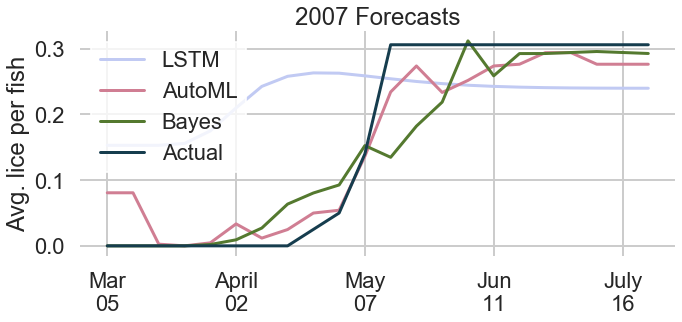

In [12]:
year = 2007
plotdata = pd.DataFrame({
        'LSTM': retrieve_dates_lstm(list(chain.from_iterable(lstm_info[f'{year}']['test_predictions_scaled']))),
        'AutoML': retrieve_dates_automl(automl_info[f'{year}']['predictions']),
        'Bayes': bayes_info[f'{year}']['test_predictions'],
        'Actual': actual_info[f'{year}'],
    })

fig, ax = plt.subplots()
p = sns.lineplot(data=plotdata, ax=ax, palette='cubehelix_r', dashes=False, lw=3)
p.legend

# set aesthetics
ax.set_ylabel('Avg. lice per fish')
ax.set_xlabel('')
plt.box(False)
ax.set_xticks([0, 5, 10, 15, 20], minor=False)
ax.set_xticklabels(['Mar\n05', 'April\n02', 'May\n07', 'Jun\n11', 'July\n16'])

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', frameon=True, ncol=1, loc='upper left', facecolor='white', edgecolor='white')
ax.set_title('2007 Forecasts')
fig.set_figwidth(10)
fig.set_figheight(5)
plt.tight_layout()
fig.savefig('2007_forecasts.png', dpi=900, transparent=True)

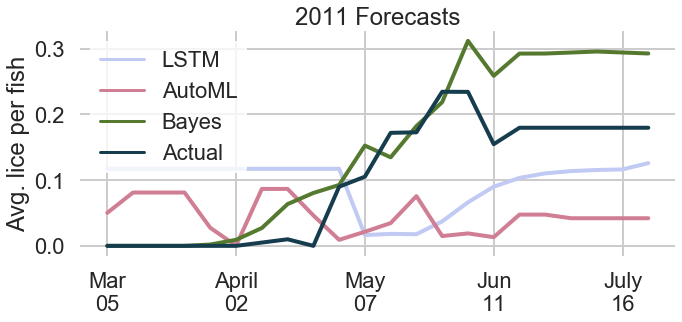

In [13]:
year = 2012
plotdata = pd.DataFrame({
        'LSTM': retrieve_dates_lstm(list(chain.from_iterable(lstm_info[f'{year}']['test_predictions_scaled']))),
        'AutoML': retrieve_dates_automl(automl_info[f'{year}']['predictions']),
        'Bayes': bayes_info[f'{year}']['test_predictions'],
        'Actual': actual_info[f'{year}'],
    })

fig, ax = plt.subplots()
p = sns.lineplot(data=plotdata, ax=ax, palette='cubehelix_r', dashes=False, lw=4)
p.legend

# set aesthetics
ax.set_ylabel('Avg. lice per fish')
ax.set_xlabel('')
plt.box(False)
ax.set_xticks([0, 5, 10, 15, 20], minor=False)
ax.set_xticklabels(['Mar\n05', 'April\n02', 'May\n07', 'Jun\n11', 'July\n16'])

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', frameon=True, ncol=1, loc='upper left', facecolor='white', edgecolor='white')
ax.set_title('2011 Forecasts')
fig.set_figwidth(10)
fig.set_figheight(5)
plt.tight_layout()
fig.savefig('2012_forecasts.png', dpi=900, transparent=True)

## Model diagnostics

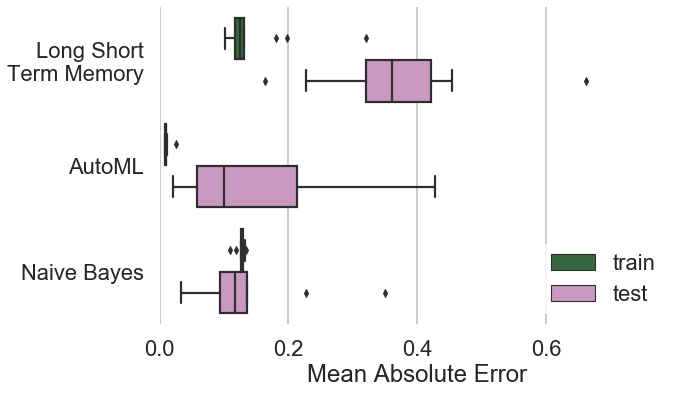

In [14]:
# prep data
lstm_train_mae = [lstm_info[key]['train_mae'] for key in lstm_info.keys()]
automl_train_mae = [automl_info[key]['train_mae'] for key in automl_info.keys()]
bayes_train_mae = [bayes_info[key]['train_mae'] for key in bayes_info.keys()]

lstm_test_mae = [lstm_info[key]['test_mae'] for key in lstm_info.keys()]
automl_test_mae = [automl_info[key]['mae'] for key in automl_info.keys()]
bayes_test_mae = [bayes_info[key]['test_mae'] for key in bayes_info.keys()]

train_test = ['train'] * 15 + ['test'] * 15

train = pd.DataFrame({
    'Long Short\nTerm Memory': lstm_train_mae + lstm_test_mae,
    'AutoML': automl_train_mae + automl_test_mae,
    'Naive Bayes': bayes_train_mae + bayes_test_mae,
    'train_test': train_test
})
plotdata = pd.melt(train, id_vars=['train_test'], value_vars=['Long Short\nTerm Memory', 'AutoML', 'Naive Bayes'])
# value_vars=['lstm', 'automl', 'bayes'])
# plot
fig, ax = plt.subplots()

# base plot
ax = sns.boxplot(x="value", y="variable",
                 hue='train_test', data=plotdata,
                 linewidth=2.2, palette='cubehelix')
# sns.stripplot(x='value', y='variable', 
#               hue='train_test', data=plotdata,
#               ax=ax, orient='h', color=".5", dodge=True)

# set aesthetics
ax.set_xlim((xmin, xmax))
ax.set_ylabel('')
ax.set_xlabel('Mean Absolute Error')
plt.box(False)
ax.set_alpha(0)
ax.set_xticks([0, 0.2, 0.4, 0.6], minor=False)
ax.set_xticks([0.1, 0.3, 0.5, 0.7], minor=True)
ax.tick_params(axis='x', which='major', color='b')
ax.tick_params(axis='x', which='minor', color='w')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', frameon=True, ncol=1, loc='lower right', facecolor='white', edgecolor='white')

fig.set_figwidth(10)
fig.set_figheight(6)
plt.tight_layout()
fig.savefig('residuals.png', dpi=900, transparent=True)

# Writeup Plots

## Model diagnostics

In [15]:
sns.set_style('whitegrid',
       {'axes.facecolor': (0, 0, 0, 0),
        'figure.facecolor': (0, 0, 0, 0)})
sns.set_context('talk')

In [16]:
writeup_dir = '../Report/'

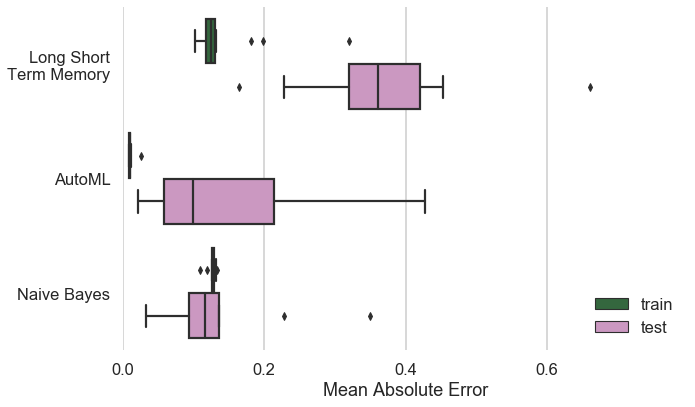

In [17]:
# prep data
lstm_train_mae = [lstm_info[key]['train_mae'] for key in lstm_info.keys()]
automl_train_mae = [automl_info[key]['train_mae'] for key in automl_info.keys()]
bayes_train_mae = [bayes_info[key]['train_mae'] for key in bayes_info.keys()]

lstm_test_mae = [lstm_info[key]['test_mae'] for key in lstm_info.keys()]
automl_test_mae = [automl_info[key]['mae'] for key in automl_info.keys()]
bayes_test_mae = [bayes_info[key]['test_mae'] for key in bayes_info.keys()]

train_test = ['train'] * 15 + ['test'] * 15

train = pd.DataFrame({
    'Long Short\nTerm Memory': lstm_train_mae + lstm_test_mae,
    'AutoML': automl_train_mae + automl_test_mae,
    'Naive Bayes': bayes_train_mae + bayes_test_mae,
    'train_test': train_test
})
plotdata = pd.melt(train, id_vars=['train_test'], value_vars=['Long Short\nTerm Memory', 'AutoML', 'Naive Bayes'])
# value_vars=['lstm', 'automl', 'bayes'])
# plot
fig, ax = plt.subplots()

# base plot
ax = sns.boxplot(x="value", y="variable",
                 hue='train_test', data=plotdata,
                 linewidth=2.2, palette='cubehelix')
# sns.stripplot(x='value', y='variable', 
#               hue='train_test', data=plotdata,
#               ax=ax, orient='h', color=".5", dodge=True)

# set aesthetics
ax.set_xlim((xmin, xmax))
ax.set_ylabel('')
ax.set_xlabel('Mean Absolute Error')
plt.box(False)
ax.set_alpha(0)
ax.set_xticks([0, 0.2, 0.4, 0.6], minor=False)
ax.set_xticks([0.1, 0.3, 0.5, 0.7], minor=True)
ax.tick_params(axis='x', which='major', color='b')
ax.tick_params(axis='x', which='minor', color='w')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', frameon=True, ncol=1, loc='lower right', facecolor='white', edgecolor='white')

fig.set_figwidth(10)
fig.set_figheight(6)
plt.tight_layout()
fig.savefig(f'{writeup_dir}residuals.png', dpi=900, transparent=True)

In [18]:
sns.set_style('whitegrid',
       {'axes.facecolor': (0, 0, 0, 0),
        'figure.facecolor': (0, 0, 0, 0)})
sns.set_context('poster')

Full forecast

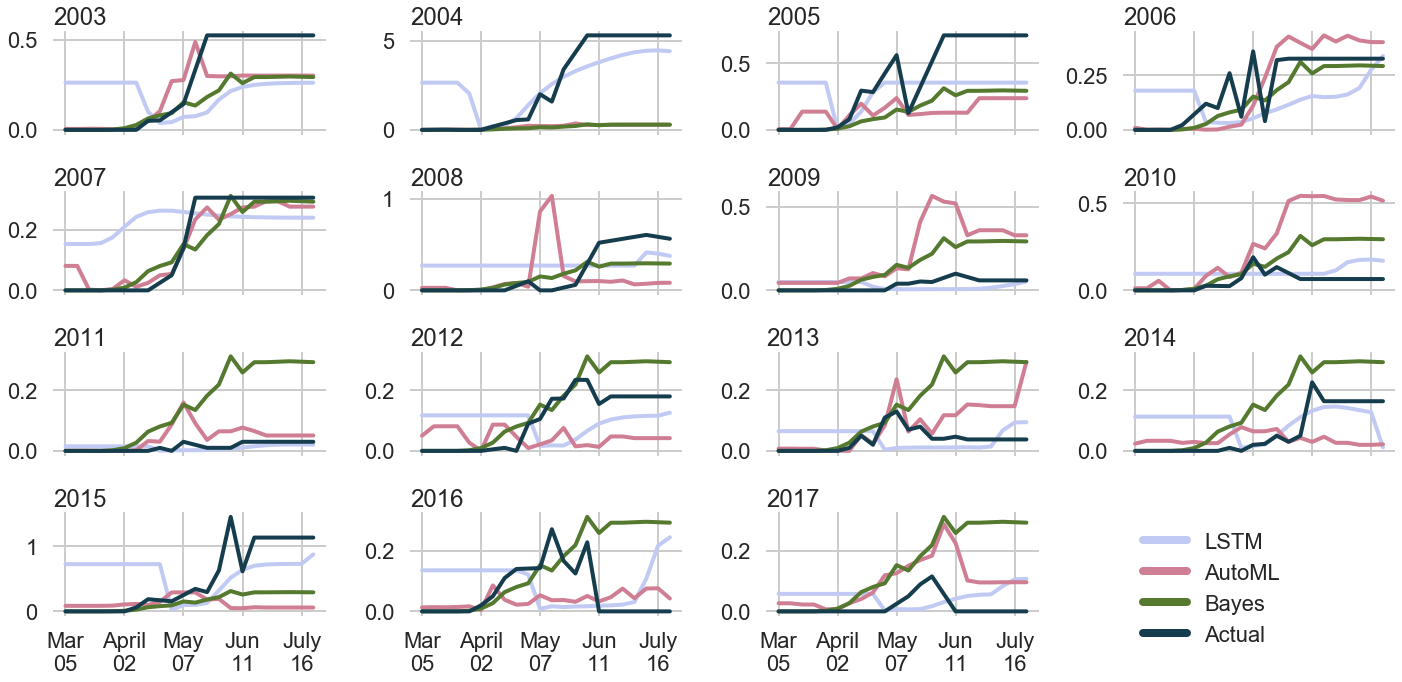

In [19]:
fig, ax = plt.subplots(nrows=4, ncols=4)
fig.set_figwidth(20)
fig.set_figheight(20)
ymax = 0

for j, year in enumerate(analysis_years):
    jx = np.unravel_index(j, ax.shape)
    
    plotdata = pd.DataFrame({
        'LSTM': retrieve_dates_lstm(list(chain.from_iterable(lstm_info[f'{year}']['test_predictions_scaled']))),
        'AutoML': retrieve_dates_automl(automl_info[f'{year}']['predictions']),
        'Bayes': bayes_info[f'{year}']['test_predictions'],
        'Actual': actual_info[f'{year}'],
    })
    
    p = sns.lineplot(data=plotdata, ax=ax[jx], 
                     palette='cubehelix_r',
                     dashes=False, lw=4)
    
    ax[jx].set_title(year, x=0.1, y=1.0)
    ax[jx].set_ylabel('')
    ax[jx].set_xlabel('')
    ax[jx].set_xticks([0, 5, 10, 15, 20], minor=False)
    ax[jx].set_xticklabels('')
    handles, labels = ax[jx].get_legend_handles_labels()
    p.legend_.remove()
    ax[jx].set(frame_on=False)
    
last_index = np.unravel_index(15, ax.shape)
for h in handles:
    h.set_linewidth(8)
ax[last_index].legend(handles, labels, title='', frameon=True, ncol=1, loc='upper left', facecolor='white', edgecolor='white')
ax[last_index].axis('off')
plt.box(False)

example_date_ixs = [12, 13, 14]
for ix in example_date_ixs:
    ur_ix = np.unravel_index(ix, ax.shape)
    ax[ur_ix].set_xticklabels(['Mar\n05', 'April\n02', 'May\n07', 'Jun\n11', 'July\n16'])

plt.ylabel('Avg. lice per fish')
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
fig.savefig(f'{writeup_dir}full_forecast.png', dpi=900)

Up to & including april

In [ ]:
with open('lstm/sufficient_info_april.json') as json_file:
    lstm_info = json.load(json_file)
with open('automl/sufficient_info_april.json') as json_file:
    automl_info = json.load(json_file)

In [ ]:
sns.set_style('whitegrid',
       {'axes.facecolor': (0, 0, 0, 0),
        'figure.facecolor': (0, 0, 0, 0)})
sns.set_context('poster')
fig, ax = plt.subplots(nrows=4, ncols=4)
fig.set_figwidth(20)
fig.set_figheight(20)
ymax = 0

for j, year in enumerate(analysis_years):
    jx = np.unravel_index(j, ax.shape)
    
    plotdata = pd.DataFrame({
        'LSTM': retrieve_dates_lstm(list(chain.from_iterable(lstm_info[f'{year}']['test_predictions_scaled']))),
        'AutoML': retrieve_dates_automl(automl_info[f'{year}']['predictions']),
        'Bayes': bayes_info[f'{year}']['test_predictions'],
        'Actual': actual_info[f'{year}'],
    })
    
    p = sns.lineplot(data=plotdata, ax=ax[jx], 
                     palette='cubehelix_r',
                     dashes=False, lw=4)
    
    ax[jx].set_title(year, x=0.1, y=1.0)
    ax[jx].set_ylabel('')
    ax[jx].set_xlabel('')
    ax[jx].set_xticks([0, 5, 10, 15, 20], minor=False)
    ax[jx].set_xticklabels('')
    handles, labels = ax[jx].get_legend_handles_labels()
    p.legend_.remove()
    ax[jx].set(frame_on=False)
    
last_index = np.unravel_index(15, ax.shape)
for h in handles:
    h.set_linewidth(8)
ax[last_index].legend(handles, labels, title='', frameon=True, ncol=1, loc='upper left', facecolor='white', edgecolor='white')
ax[last_index].axis('off')
plt.box(False)

example_date_ixs = [12, 13, 14]
for ix in example_date_ixs:
    ur_ix = np.unravel_index(ix, ax.shape)
    ax[ur_ix].set_xticklabels(['Mar\n05', 'April\n02', 'May\n07', 'Jun\n11', 'July\n16'])

plt.ylabel('Avg. lice per fish')
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
fig.savefig(f'{writeup_dir}april_forecast.png', dpi=900)

Up to & including June

In [ ]:
with open('lstm/sufficient_info_june.json') as json_file:
    lstm_info = json.load(json_file)
with open('automl/sufficient_info_june.json') as json_file:
    automl_info = json.load(json_file)

In [ ]:
sns.set_style('whitegrid',
       {'axes.facecolor': (0, 0, 0, 0),
        'figure.facecolor': (0, 0, 0, 0)})
sns.set_context('poster')
fig, ax = plt.subplots(nrows=4, ncols=4)
fig.set_figwidth(20)
fig.set_figheight(20)
ymax = 0

for j, year in enumerate(analysis_years):
    jx = np.unravel_index(j, ax.shape)
    
    plotdata = pd.DataFrame({
        'LSTM': retrieve_dates_lstm(list(chain.from_iterable(lstm_info[f'{year}']['test_predictions_scaled']))),
        'AutoML': retrieve_dates_automl(automl_info[f'{year}']['predictions']),
        'Bayes': bayes_info[f'{year}']['test_predictions'],
        'Actual': actual_info[f'{year}'],
    })
    
    p = sns.lineplot(data=plotdata, ax=ax[jx], 
                     palette='cubehelix_r',
                     dashes=False, lw=4)
    
    ax[jx].set_title(year, x=0.1, y=1.0)
    ax[jx].set_ylabel('')
    ax[jx].set_xlabel('')
    ax[jx].set_xticks([0, 5, 10, 15, 20], minor=False)
    ax[jx].set_xticklabels('')
    handles, labels = ax[jx].get_legend_handles_labels()
    p.legend_.remove()
    ax[jx].set(frame_on=False)
    
last_index = np.unravel_index(15, ax.shape)
for h in handles:
    h.set_linewidth(8)
ax[last_index].legend(handles, labels, title='', frameon=True, ncol=1, loc='upper left', facecolor='white', edgecolor='white')
ax[last_index].axis('off')
plt.box(False)

example_date_ixs = [12, 13, 14]
for ix in example_date_ixs:
    ur_ix = np.unravel_index(ix, ax.shape)
    ax[ur_ix].set_xticklabels(['Mar\n05', 'April\n02', 'May\n07', 'Jun\n11', 'July\n16'])

plt.ylabel('Avg. lice per fish')
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
fig.savefig(f'{writeup_dir}june_forecast.png', dpi=900)